<h3> Task-1 </h3>

a) Convert $3-3i$ into polar form

b) convert 5e^ipi/3 into rectangle form

In [1]:
from math import sin,cos,pi,asin
r = abs(complex(3,-3))
alpha = asin(-3/pi)
print(f"{r}e^(i{alpha})")

4.242640687119285e^(i-1.269422717049605)


In [2]:
r = 5
alpha = pi/3
result = r*complex(cos(alpha),sin(alpha))
print(result)

(2.5000000000000004+4.330127018922193j)


<h3> Task 2 </h3>

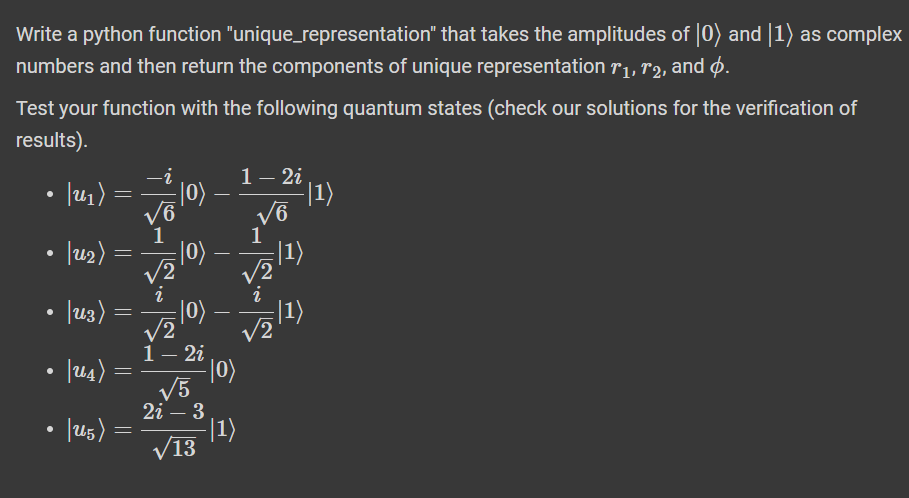

In [3]:
from math import sqrt
def euler_formula(c):
    Re = c.real
    Im = c.imag
    r = abs(c)
    theta = asin(Im/r)
    if Re<0:
        theta = pi - theta
    return (r,theta)

def unique_representation(c1,c2):
    if c1==0:
        r1 = theta1 = 0
    else:
        [r1,theta1] = euler_formula(c1)
    if c2==0:
        r2=theta2=0
    else:
        [r2,theta2] = euler_formula(c2)
    return [r1,r2,theta2-theta1]


In [4]:
states = [
    [complex(0, -1/sqrt(6)), complex(-1/sqrt(6),2/sqrt(6))],
    [complex(1/sqrt(2),0), complex(-1/sqrt(2),0)],
    [complex(1/sqrt(2)), complex(0,-1/sqrt(2))],
    [complex(1/sqrt(5),-2/sqrt(5)),0],
    [0,complex(-3/sqrt(13),2/sqrt(13))]
]

for state in states:
    [alpha,beta] = state
    [r1,r2,phi] = unique_representation(alpha,beta)
    print('the state is')
    c1 = complex(round(state[0].real,3) , round(state[0].imag,3))
    c2 = complex(round(state[1].real,3) , round(state[1].imag,3))
    print(c1,"|0> + ",c2,"|1>")
    r1 = round(r1,3)
    r2 = round(r2,3)
    multiple_of_pi = round(phi/pi,3)
    phi = round(phi,3)
    print('The unique representation: ')
    print(r1,'|0> +',r2,'exp(i(',multiple_of_pi,")pi) |1>")
    print()

the state is
-0.408j |0> +  (-0.408+0.816j) |1>
The unique representation: 
0.408 |0> + 0.913 exp(i( 1.148 )pi) |1>

the state is
(0.707+0j) |0> +  (-0.707+0j) |1>
The unique representation: 
0.707 |0> + 0.707 exp(i( 1.0 )pi) |1>

the state is
(0.707+0j) |0> +  -0.707j |1>
The unique representation: 
0.707 |0> + 0.707 exp(i( -0.5 )pi) |1>

the state is
(0.447-0.894j) |0> +  0j |1>
The unique representation: 
1.0 |0> + 0 exp(i( 0.352 )pi) |1>

the state is
0j |0> +  (-0.832+0.555j) |1>
The unique representation: 
0 |0> + 1.0 exp(i( 0.813 )pi) |1>



<h3> Task 3 </h3>

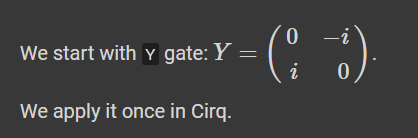

In [5]:
!pip install cirq --quiet
!pip install qutip --quiet


In [19]:
import cirq
import numpy as np
from cirq_web import BlochSphere

q = cirq.NamedQubit("q0")
qc = cirq.Circuit()
qc.append(cirq.Y(q))
print(qc)

q0: ───Y───


In [20]:
U = cirq.unitary(cirq.Y)

print('The matrix form of Y is: ')
for row in U:
    row_str=""
    for col in row:
        row_str +=str(np.round(col,3))+" "
    print(row_str)
print()


The matrix form of Y is: 
0j -1j 
1j 0j 



In [21]:
state_vec = cirq.final_state_vector(qc)
ket = cirq.dirac_notation(state_vector=state_vec)
print(ket)

1j|1⟩


In [22]:
qc.append(cirq.measure(q))
sim = cirq.Simulator()
results = sim.run(qc)
print(results)

q0=1


In [23]:
sphere = BlochSphere(state_vector = state_vec,sphere_radius = 3)
display(sphere)

Here, Y|0> and X|0> result in the quantum states differing by a global phase i.e., i|1> and |1>,respectively

<h3> Task 4 </h3>

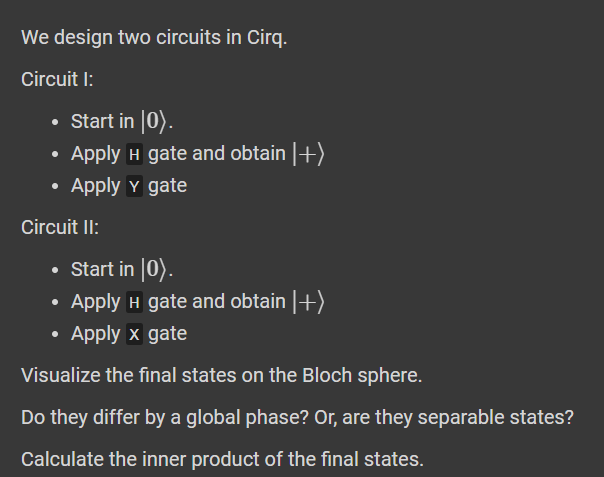

In [24]:
# circuit 1
q = cirq.NamedQubit('q0')
qc = cirq.Circuit()
qc.append(cirq.H(q))
qc.append(cirq.Y(q))
state_vec = cirq.final_state_vector(qc)
ket = cirq.dirac_notation(state_vector=state_vec)
print(ket)
sphere = BlochSphere(state_vector=state_vec,sphere_radius=3)
display(sphere)

-0.71j|0⟩ + 0.71j|1⟩


In [25]:
# circuit 2
q = cirq.NamedQubit('q0')
qc = cirq.Circuit()
qc.append(cirq.H(q))
qc.append(cirq.X(q))
state_vec_2 = cirq.final_state_vector(qc)
ket_2 = cirq.dirac_notation(state_vector=state_vec)
print(ket_2)
sphere_2 = BlochSphere(state_vector=state_vec,sphere_radius=3)
display(sphere_2)

-0.71j|0⟩ + 0.71j|1⟩


In [18]:
print('The fist final state is: ',state_vec)
print('The 2nd  final state is: ',state_vec_2)
print('The inner product: ',np.inner(state_vec,state_vec_2))

The fist final state is:  [0.-0.70710677j 0.+0.70710677j]
The 2nd  final state is:  [0.70710677+0.j 0.70710677+0.j]
The inner product:  0j


<h3> Task 5 </h3>

Implement <mark> s-dagger </mark> and <mark> T-dagger </mark>

In [10]:
print('S is')
print(cirq.unitary(cirq.S))
print()

#S-dagger
sdg = cirq.Z**(-1/2)
print('s-dagger')
print(cirq.unitary(sdg))
print()

#T
print('T is')
print(cirq.unitary(cirq.T))
print()

#T-dagger
Tdg = cirq.Z**(-1/4)
print('T-dagger')
print(cirq.unitary(Tdg))
print()

S is
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

s-dagger
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]

T is
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]

T-dagger
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]



In [11]:
# another way

sdg = cirq.inverse(cirq.S)
print('s-dagger')
print(cirq.unitary(sdg))
print()

#T dagger
Tdg = cirq.inverse(cirq.T)
print('T-dagger')
print(cirq.unitary(Tdg))
print()

s-dagger
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]

T-dagger
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]



<h3> Task 6 </h3>

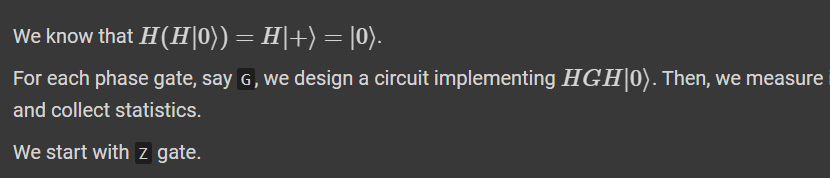

In [16]:
q = cirq.NamedQubit('q0')

qc = cirq.Circuit()

qc.append(cirq.H(q))
qc.append(cirq.Z(q))
qc.append(cirq.H(q))
qc.append(cirq.measure(q,key = 'result'))
print(qc)

q0: ───H───Z───H───M('result')───


In [17]:
sim = cirq.Simulator()
samples = sim.run(qc,repetitions=1000)
print('outcomes: ',samples.histogram(key='result'))

outcomes:  Counter({1: 1000})


<h3> Task 7 </h3>

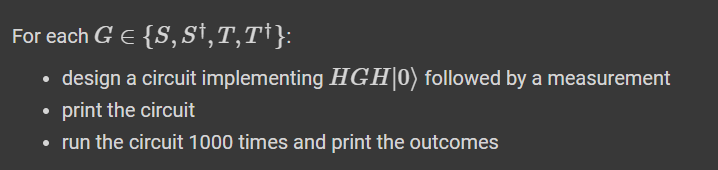

In [18]:
phase_gates = [cirq.S,cirq.inverse(cirq.S),cirq.T,cirq.inverse(cirq.T)]

for G in phase_gates:
    q = cirq.NamedQubit('q0')
    qc = cirq.Circuit()
    qc.append(cirq.H(q))
    qc.append(G(q))
    qc.append(cirq.H(q))
    qc.append(cirq.measure(q,key='result'))
    print(qc)
    sim = cirq.Simulator()
    samples = sim.run(qc,repetitions=1000)
    print('outcomes: ',samples.histogram(key='result'))

q0: ───H───S───H───M('result')───
outcomes:  Counter({1: 503, 0: 497})
q0: ───H───S^-1───H───M('result')───
outcomes:  Counter({0: 502, 1: 498})
q0: ───H───T───H───M('result')───
outcomes:  Counter({0: 872, 1: 128})
q0: ───H───T^-1───H───M('result')───
outcomes:  Counter({0: 840, 1: 160})
